In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

In [2]:
data=pd.read_csv('/kaggle/input/students-performance-dataset/Student_performance_data _.csv')
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [3]:
data.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [4]:
data.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
new_data=data.drop(columns=['StudentID','GPA','Age'])
new_data

,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
1,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
2,0,2,3,4.210570,26,0,2,0,0,0,0,4.0
3,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
4,1,0,2,4.672495,17,1,3,0,0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2387,1,0,3,10.680555,2,0,4,1,0,0,0,0.0
2388,0,0,1,7.583217,4,1,4,0,1,0,0,4.0
2389,1,0,2,6.805500,20,0,2,0,0,0,1,2.0
2390,1,1,0,12.416653,17,0,2,0,1,1,0,1.0


In [7]:
numeric_columns=[col for col in new_data.columns if new_data[col].nunique()>5]
numeric_columns

['StudyTimeWeekly', 'Absences']

In [8]:
categorical_columns = new_data.columns.difference(numeric_columns).difference(['GradeClass']).to_list()
categorical_columns

['Ethnicity',
 'Extracurricular',
 'Gender',
 'Music',
 'ParentalEducation',
 'ParentalSupport',
 'Sports',
 'Tutoring',
 'Volunteering']

In [9]:
custom_labels = {
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'Age': [15, 16, 17, 18],
    'ParentalEducation': ['None', 'High School', 'Some College', 'Bachelor\'s', 'Higher'],
    'Tutoring': ['No', 'Yes'],
    'ParentalSupport': ['No', 'Low', 'Moderate', 'High', 'Very High'],
    'Extracurricular': ['No', 'Yes'],
    'Sports': ['No', 'Yes'],
    'Music': ['No', 'Yes'],
    'Volunteering': ['No', 'Yes'],
    'Gender': ['Male', 'Female']
}

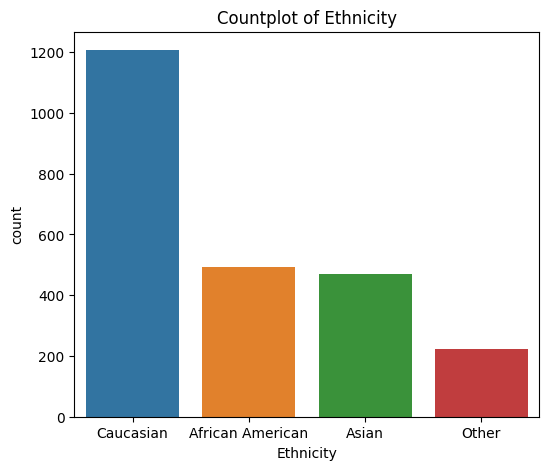

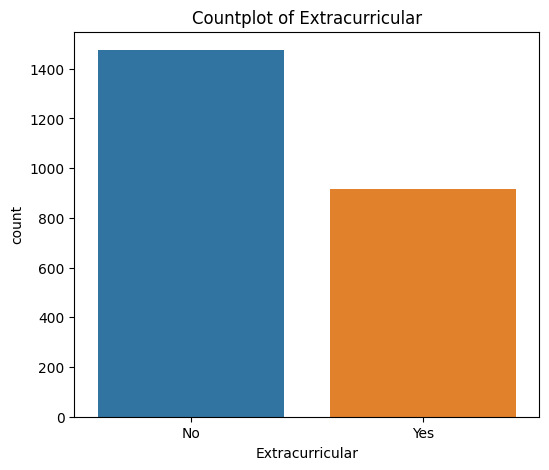

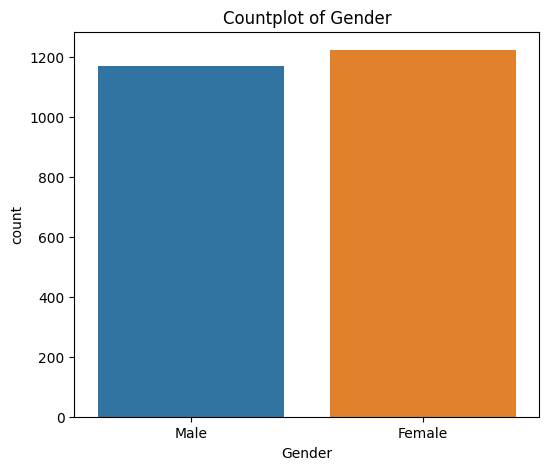

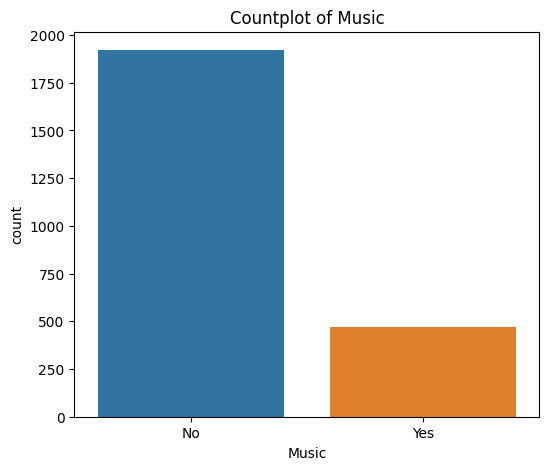

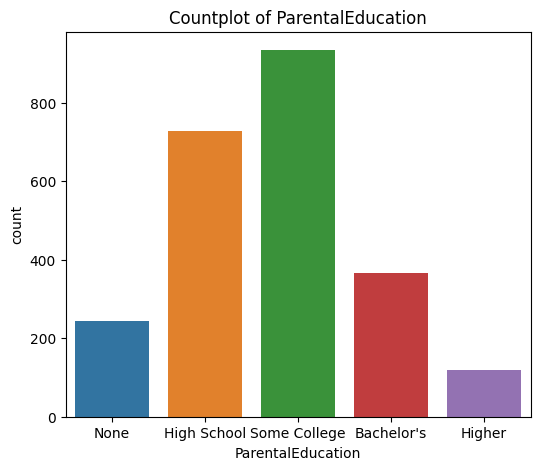

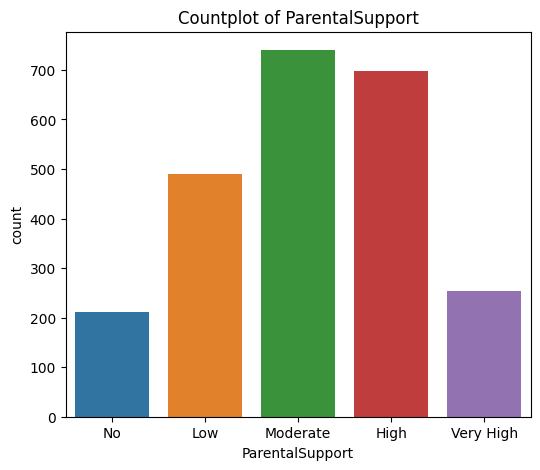

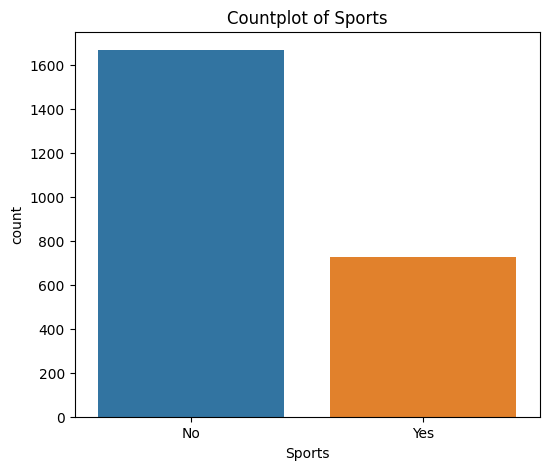

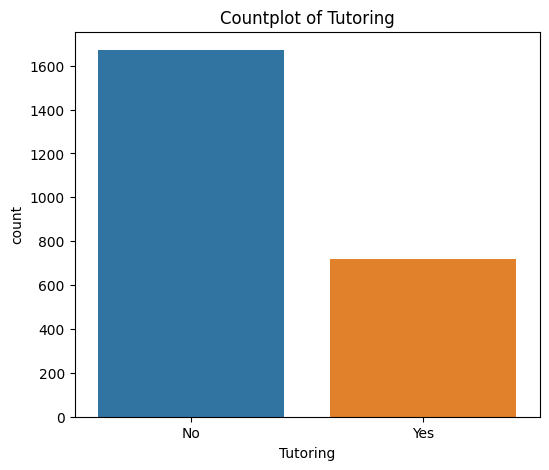

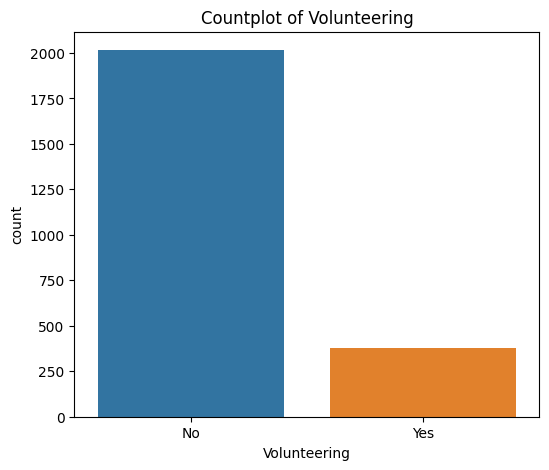

In [10]:
for column in categorical_columns:
    plt.figure(figsize=(6,5))
    sns.countplot(data=new_data,x=column)
    plt.title(f'Countplot of {column}')
    
    labels=custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)
    
    plt.show()

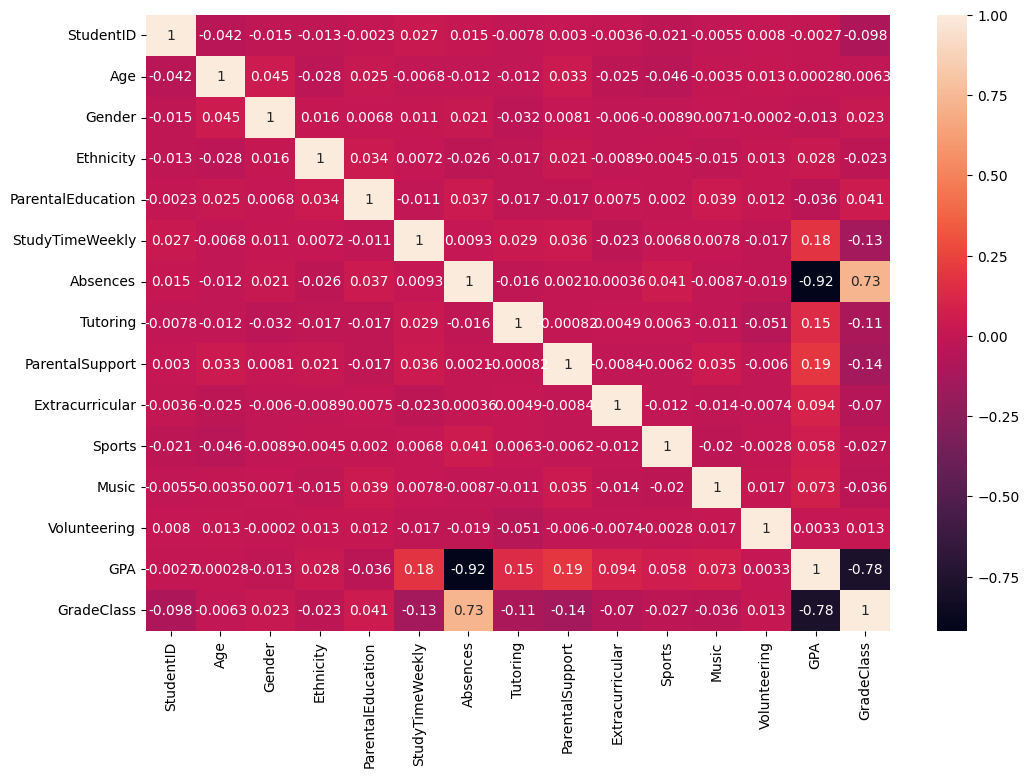

In [11]:
corelation=data.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corelation,annot=True);

In [12]:
new_data['GradeClass'].value_counts()

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64

In [13]:
X=new_data.drop(columns='GradeClass')
X

,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
0,1,0,2,19.833723,7,1,2,0,0,1,0
1,0,0,1,15.408756,0,0,1,0,0,0,0
2,0,2,3,4.210570,26,0,2,0,0,0,0
3,1,0,3,10.028829,14,0,3,1,0,0,0
4,1,0,2,4.672495,17,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2387,1,0,3,10.680555,2,0,4,1,0,0,0
2388,0,0,1,7.583217,4,1,4,0,1,0,0
2389,1,0,2,6.805500,20,0,2,0,0,0,1
2390,1,1,0,12.416653,17,0,2,0,1,1,0


In [14]:
y=new_data['GradeClass']
y

0       2.0
1       1.0
2       4.0
3       3.0
4       4.0
       ... 
2387    0.0
2388    4.0
2389    2.0
2390    1.0
2391    1.0
Name: GradeClass, Length: 2392, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=4)

In [17]:
DT=DecisionTreeClassifier(criterion='entropy',max_depth=7,max_features=7,splitter='best',min_samples_leaf=15,random_state=2,min_impurity_decrease=0.01)

In [18]:
DT.fit(Xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=7,
                       min_impurity_decrease=0.01, min_samples_leaf=15,
                       random_state=2)

In [19]:
ypred=DT.predict(Xtest)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.7515657620041754

In [21]:
lor=LogisticRegression(penalty=None,solver='lbfgs',max_iter=500,multi_class='multinomial')

In [22]:
lor.fit(Xtrain,ytrain)

LogisticRegression(max_iter=500, multi_class='multinomial', penalty=None)

In [23]:
ypred=lor.predict(Xtest)

In [24]:
accuracy_score(ytest,ypred)

0.7766179540709812

In [25]:
estimators=[('Decision Tree',DT),('Logistic Regression',lor)]

In [26]:
for estimator in estimators:
    x=cross_val_score(estimator[1],Xtrain,ytrain,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

Decision Tree 0.66
Logistic Regression 0.71


## Voting Classifier

In [27]:
from sklearn.ensemble import VotingClassifier

In [28]:
vc=VotingClassifier(estimators=estimators,voting='soft')
x=cross_val_score(vc,Xtrain,ytrain,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.69
